In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Fertilizer Prediction.csv')

In [4]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [5]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt 

<AxesSubplot:>

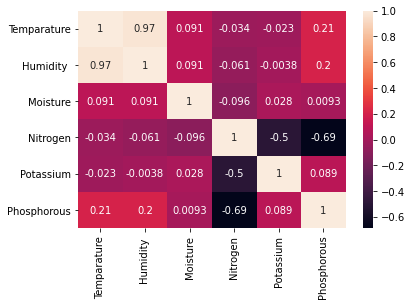

In [8]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True)

In [9]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
20-20       14
14-35-14    14
10-26-26     7
17-17-17     7
Name: Fertilizer Name, dtype: int64

In [10]:
df['Soil Type'].value_counts()

Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64

In [11]:
df['Crop Type'].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Ground Nuts     7
Oil seeds       7
Barley          7
Tobacco         7
Maize           6
Name: Crop Type, dtype: int64

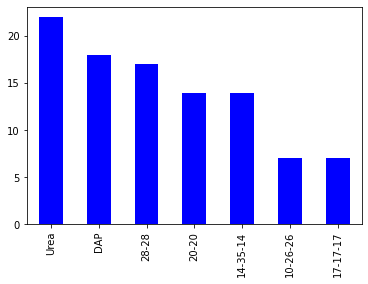

In [12]:
df['Fertilizer Name'].value_counts().plot(kind='bar',color=('blue'));

In [13]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['Soil Type']= label_encoder.fit_transform(df['Soil Type'])
df['Crop Type']= label_encoder.fit_transform(df['Crop Type'])
df['Fertilizer Name']= label_encoder.fit_transform(df['Fertilizer Name'])

In [14]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Temparature      99 non-null     int64
 1   Humidity         99 non-null     int64
 2   Moisture         99 non-null     int64
 3   Soil Type        99 non-null     int32
 4   Crop Type        99 non-null     int32
 5   Nitrogen         99 non-null     int64
 6   Potassium        99 non-null     int64
 7   Phosphorous      99 non-null     int64
 8   Fertilizer Name  99 non-null     int32
dtypes: int32(3), int64(6)
memory usage: 5.9 KB


In [16]:
X = df[['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous']]
y = df['Fertilizer Name']

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
sm = SMOTE(random_state=10)

In [19]:
X_res, y_res = sm.fit_resample(X, y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((123, 8), (123,), (31, 8), (31,))

In [21]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=10)
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [24]:
storeResults('DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# LightGBM

In [25]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(random_state=10)
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

lg_acc = accuracy_score(y_pred, y_test)
lg_prec = precision_score(y_pred, y_test,average='weighted')
lg_rec = recall_score(y_pred, y_test,average='weighted')
lg_f1 = f1_score(y_pred, y_test,average='weighted')

In [26]:
storeResults('LightGBM',lg_acc,lg_prec,lg_rec,lg_f1)

# XGBoost

In [27]:
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=10)
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

xg_acc = accuracy_score(y_pred, y_test)
xg_prec = precision_score(y_pred, y_test,average='weighted')
xg_rec = recall_score(y_pred, y_test,average='weighted')
xg_f1 = f1_score(y_pred, y_test,average='weighted')

In [28]:
storeResults('XGBoost',xg_acc,xg_prec,xg_rec,xg_f1)

# AdaBoost

In [29]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ab_acc = accuracy_score(y_pred, y_test)
ab_prec = precision_score(y_pred, y_test,average='weighted')
ab_rec = recall_score(y_pred, y_test,average='weighted')
ab_f1 = f1_score(y_pred, y_test,average='weighted')

In [30]:
storeResults('AdaBoost',ab_acc,ab_prec,ab_rec,ab_f1)

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [32]:
storeResults('RandomForest',rf_acc,rf_prec,rf_rec,rf_f1)

# ExtraTree Classifier

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [34]:
storeResults('ExtraTree',rf_acc,rf_prec,rf_rec,rf_f1)

# Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [36]:
storeResults('GradientBoosting',rf_acc,rf_prec,rf_rec,rf_f1)

# Bagging Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier

In [38]:
clf = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [39]:
storeResults('Bagging Classifier',rf_acc,rf_prec,rf_rec,rf_f1)

# Stacking Classifier

In [40]:
from sklearn.ensemble import StackingClassifier

In [41]:
RANDOM_SEED = 42

clf1 = LGBMClassifier(random_state=10)
clf2 = XGBClassifier(random_state=10)
clf3 = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
clf4 = DecisionTreeClassifier(random_state=10)
forest = RandomForestClassifier()

In [42]:
estimators = [('lgbm', clf1),('xgb', clf2),('ab', clf3),('dt', clf4)]

In [43]:
clf = StackingClassifier(estimators=estimators, final_estimator=forest)

In [44]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

meta_acc = accuracy_score(y_pred, y_test)
meta_prec = precision_score(y_pred, y_test,average='weighted')
meta_rec = recall_score(y_pred, y_test,average='weighted')
meta_f1 = f1_score(y_pred, y_test,average='weighted')

In [45]:
storeResults('Stacking Ensemble',meta_acc,meta_prec,meta_rec,meta_f1)

# K-Fold

In [46]:
from mlxtend.classifier import StackingCVClassifier
from sklearn import model_selection

In [47]:
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3,clf4],
                            meta_classifier=forest,
                            random_state=RANDOM_SEED)

In [48]:
for clf, label in zip([clf1, clf2, clf3,clf4, sclf], 
                      ['LightGBM', 
                       'XGBoost', 
                       'AdaBoost',
                       'DecisionTree',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.05) [LightGBM]
Accuracy: 0.97 (+/- 0.02) [XGBoost]
Accuracy: 0.58 (+/- 0.05) [AdaBoost]
Accuracy: 0.97 (+/- 0.02) [DecisionTree]
Accuracy: 0.97 (+/- 0.04) [StackingClassifier]


# Voting Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)
clf2 = DecisionTreeClassifier(random_state=10)

eclf1 = VotingClassifier(estimators=[('bagging', clf1), ('dt', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [50]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1)

In [51]:
labels_new = ['BaggingClassifiier', 'DecisionTree', 'Voting_Classifier']

In [52]:
for clf, label in zip([clf1, clf2, eclf1], labels_new):
 
    # Use cross_val_score to compute accuracy scores using 5-fold cross-validation
    scores = model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
     
    # Print the mean accuracy and standard deviation of accuracy for the current classifier
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy: 0.99 (+/- 0.02) [BaggingClassifiier]
Accuracy: 0.97 (+/- 0.02) [DecisionTree]
Accuracy: 0.97 (+/- 0.02) [Voting_Classifier]


# Comparison

In [53]:
#creating dataframe
import pandas as pd
import numpy as np
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                                                
                      })

In [54]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,DecisionTree,1.000,1.000,1.000,1.000
1,LightGBM,1.000,1.000,1.000,1.000
2,XGBoost,1.000,1.000,1.000,1.000
3,AdaBoost,0.645,0.738,0.645,0.942
4,RandomForest,1.000,1.000,1.000,1.000
5,ExtraTree,1.000,1.000,1.000,1.000
6,GradientBoosting,1.000,1.000,1.000,1.000
7,Bagging Classifier,1.000,1.000,1.000,1.000
8,Stacking Ensemble,1.000,1.000,1.000,1.000
9,Voting Classifier,1.000,1.000,1.000,1.000


# Modelling

In [37]:
import joblib
filename = 'model_fertilizer.sav'
joblib.dump(eclf1, filename)

['model_fertilizer.sav']

# Graph

In [55]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

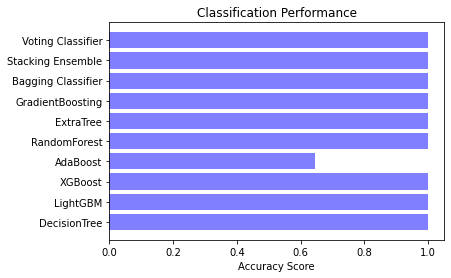

In [56]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

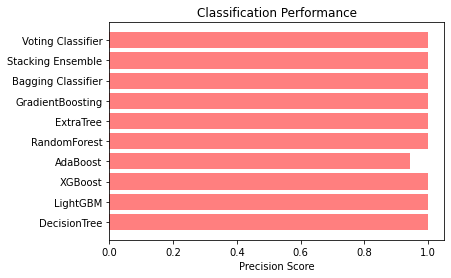

In [57]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

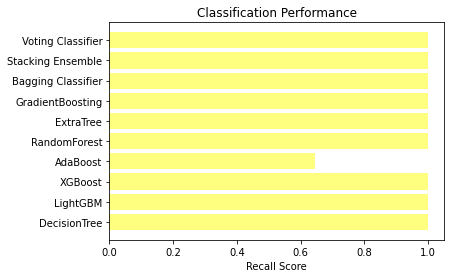

In [58]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

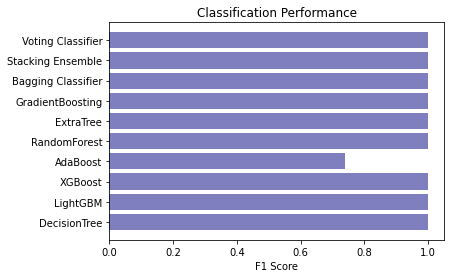

In [59]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()